## Preparação e informações gerais

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Envie uma solicitação GET para a URL desejada
path = requests.get('https://import.cdn.thinkific.com/401289/gQbVuYr9TaimUX9dQAqV_enem_2023.json')

In [3]:
# Transformando o arquivo JSON em um dataframe com pandas
df_enem = pd.read_json(path.text)
df_enem.head()

<ipython-input-3-3b3082d0d36d>:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_enem = pd.read_json(path.text)


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [4]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


## 1. Qual das disciplinas têm a maior amplitude de nota?

R: Redação

In [5]:
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [6]:
amplitude_linguagens = df_enem['Linguagens'].max() - df_enem['Linguagens'].min()
amplitude_linguagens

517.4563171927

In [7]:
amplitude_ciencias_humanas = df_enem['Ciências humanas'].max() - df_enem['Ciências humanas'].min()
amplitude_ciencias_humanas

474.0196954613

In [8]:
amplitude_ciencias_da_natureza = df_enem['Ciências da natureza'].max() - df_enem['Ciências da natureza'].min()
amplitude_ciencias_da_natureza

487.60456835130003

In [9]:
amplitude_matematica = df_enem['Matemática'].max() - df_enem['Matemática'].min()
amplitude_matematica

488.0779018921

In [10]:
amplitude_redacao = df_enem['Redação'].max() - df_enem['Redação'].min()
amplitude_redacao

729.1600351395

## 2. Qual é a média e a mediana para cada uma das disciplinas?
 (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [11]:
df_media = df_enem.copy()
df_mediana = df_enem.copy()

Média

In [12]:
df_media[['Linguagens','Ciências humanas','Ciências da natureza','Matemática', 'Redação']].mean()

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


Mediana

In [13]:
df_mediana[['Linguagens','Ciências humanas','Ciências da natureza','Matemática', 'Redação']].median(skipna=True)

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


##  3.Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
1. Redação - 2
2. Matemática e suas Tecnologias - 4
3. Linguagens, Códigos e suas Tecnologias - 2
4. Ciências Humanas e suas Tecnologias - 1
5. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

>Desvio padrão = 404.36 </br>
>Média = 5572.90

In [14]:
# Criando uma copia do df principal para a analise
df_cicomputacao = df_enem.copy()
df_cicomputacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [15]:
df_cicomputacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [16]:
# Multiplicando colunas pelo peso de suas notas
df_cicomputacao['Redação'] = df_cicomputacao['Redação'] * 2
df_cicomputacao['Matemática'] = df_cicomputacao['Matemática'] * 4
df_cicomputacao['Linguagens'] = df_cicomputacao['Linguagens'] * 2

In [17]:
# Criando a coluna de somatório de notas
df_cicomputacao['Somatorio'] = df_cicomputacao['Redação'] + df_cicomputacao['Matemática'] + df_cicomputacao['Linguagens'] + df_cicomputacao['Ciências humanas'] + df_cicomputacao['Ciências da natureza']
df_cicomputacao.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Somatorio
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,Homem,5150.201992
1,718.769216,642.084134,NaN,1648.820827,1483.650511,Mulher,NaN
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,Homem,6231.924171
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,Homem,5765.260643
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,Homem,5437.651463


In [18]:
# As 500 pessoas mais bem colocadas com base nos pesos da UFPE
df_500_colocados = df_cicomputacao.nlargest(500, 'Somatorio')
df_500_colocados['Somatorio'].describe()

,Somatorio
count,500.000000
mean,5572.896772
std,404.358663
min,4899.699005
25%,5241.009864
50%,5537.271442
75%,5863.921153
max,6829.877324


In [20]:
# desvio padrão dos 500 colocados
std_500 = df_500_colocados['Somatorio'].std()
std_500

404.3586629946426

In [19]:
# média dos 500 colocados
media_500 = df_500_colocados['Somatorio'].mean()
media_500

5572.896772018768

## 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

> Variância = 29576.75 </br>
> média = 6366.83


In [21]:
df_40_vagas = df_cicomputacao.nlargest(40, 'Somatorio')
df_40_vagas.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Somatorio
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1172.553211,554.327484,522.298209,2622.603326,1495.045186,6366.827415
std,205.286797,80.066997,71.969522,319.983127,210.050262,171.978924
min,624.104021,425.348443,356.306207,2090.762337,1069.426319,6192.127105
25%,1032.808655,495.617302,484.266155,2387.211513,1377.474161,6231.365518
50%,1192.723044,562.095823,526.089136,2614.646986,1524.559833,6312.947021
75%,1340.140514,610.319385,549.740788,2880.173266,1645.555472,6452.639111
max,1608.912634,763.919695,683.228347,3231.511608,1862.610550,6829.877324


In [22]:
# variancia dos 40 candidatos com base no somatorio
variancia_40 = df_40_vagas['Somatorio'].var()
variancia_40

29576.75036004102

In [23]:
# media dos 40 candidatos
media_40 = df_40_vagas['Somatorio'].mean()
media_40

6366.827415075188

## 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

R: 571.64 para linguagens e 592.91 para matemática

In [24]:
q3_matematica = df_enem['Matemática'].quantile(0.75)
q3_matematica

592.9129628887

In [25]:
q3_linguagens = df_enem['Linguagens'].quantile(0.75)
q3_linguagens

571.6358759278

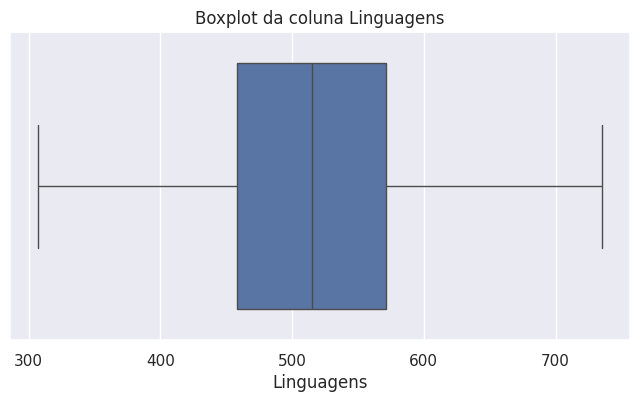

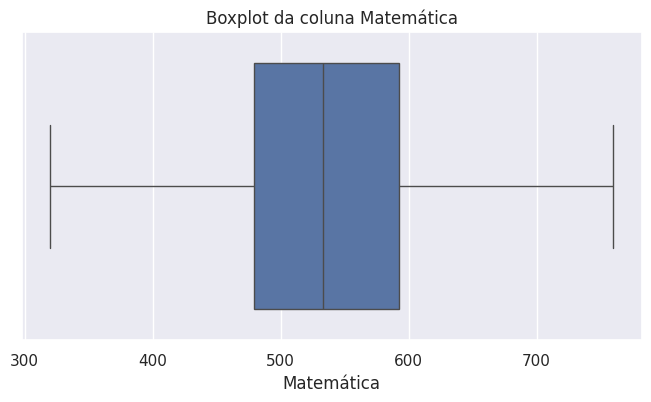

In [26]:
# Lista com as colunas específicas para plotar
colunas_especificas = ['Linguagens', 'Matemática']

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

for column in colunas_especificas:
  plt.figure()
  sns.boxplot(data = df_enem, x = column, showfliers = False)
  plt.title(f'Boxplot da coluna {column}')

## 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.

Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

R: Sim, são histogramas simétricos.

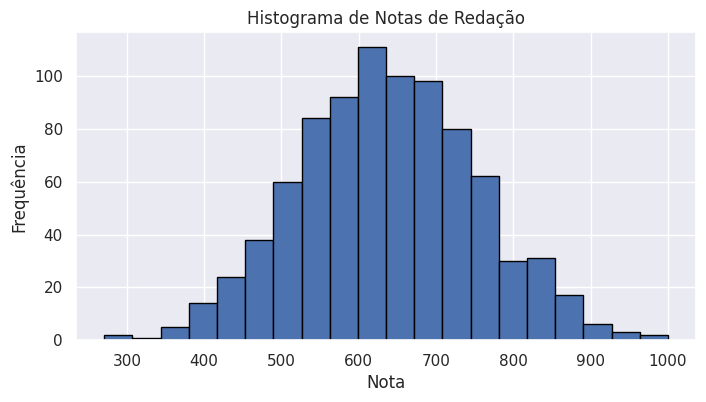

In [27]:
plt.hist(df_enem['Redação'], bins=20, edgecolor='black')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Histograma de Notas de Redação')
plt.show()

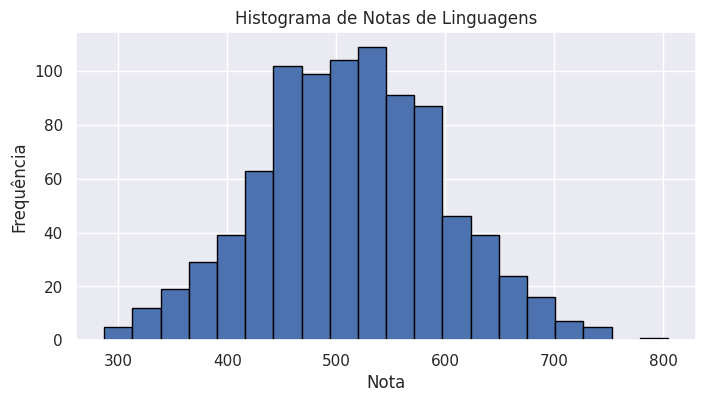

In [28]:
plt.hist(df_enem['Linguagens'], bins=20, edgecolor='black')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Histograma de Notas de Linguagens')
plt.show()

## 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria?
plt.hist(dado, bins=_, range=[0, 1000])

R: sim, continuam simetricos, a diferença é que os registros estão mais espaçados.


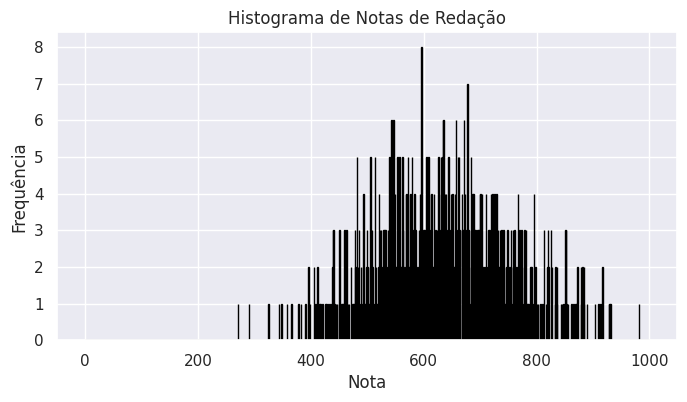

In [29]:
plt.hist(df_enem['Redação'], bins=range(0, 1000), edgecolor='black')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Histograma de Notas de Redação')
plt.show()

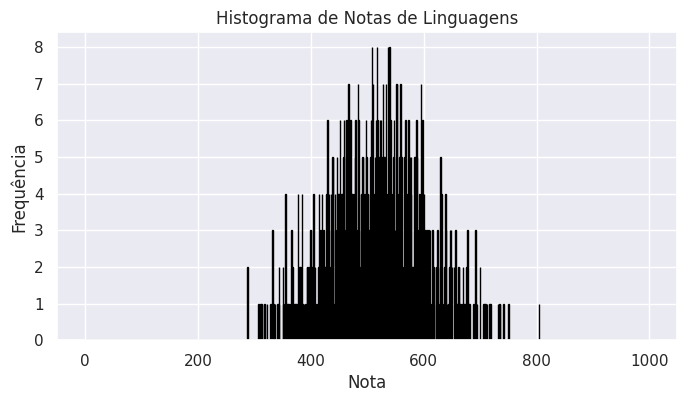

In [30]:
plt.hist(df_enem['Linguagens'], bins=range(0, 1000), edgecolor='black')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Histograma de Notas de Linguagens')
plt.show()

## 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers?
Utilize o método IQR.

R: Sim, é possível.

In [31]:
def find_outliers_iqr(df_enem, colname):
  df = df_enem[colname]
  outliers = []
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  for i in df.values:
    if (i < q1 - 1.5 * iqr) or (i > q3 + 1.5 * iqr):
      outliers.append(i)
  print(f'Outliers para a coluna {colname}: {outliers}')
  return outliers

In [32]:
find_outliers_iqr(df_enem, 'Ciências da natureza')

Outliers para a coluna Ciências da natureza: [802.0045683513, 732.5029639878, 718.3960614586]


[802.0045683513, 732.5029639878, 718.3960614586]

In [33]:
find_outliers_iqr(df_enem, 'Redação')

Outliers para a coluna Redação: [270.8399648605, 290.3086081677, 1000.0, 981.0165529826]


[270.8399648605, 290.3086081677, 1000.0, 981.0165529826]

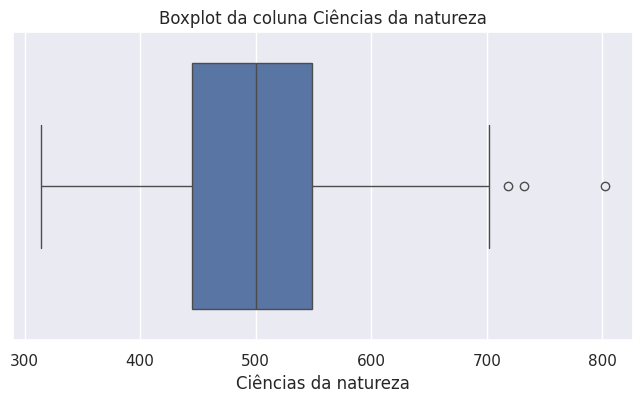

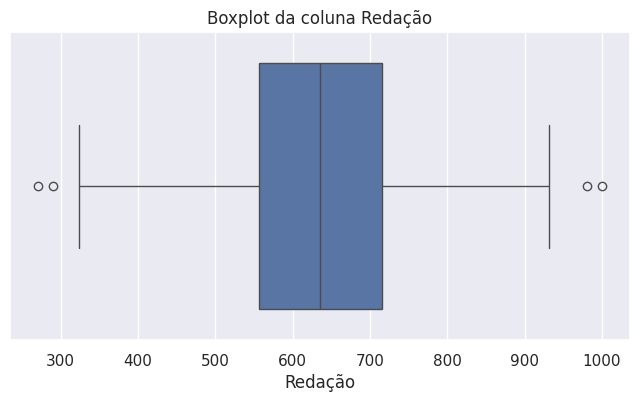

In [34]:
colunas_especificas_1 = ['Ciências da natureza', 'Redação']
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

for column in colunas_especificas_1:
  plt.figure()
  sns.boxplot(data = df_enem, x = column, showfliers = True)
  plt.title(f'Boxplot da coluna {column}')

## 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente?
(considere significativamente um valor acima de 5%)


R: Para o df original, sem tratar os valores nulos, não - retirando os outliers não altera a média.

Já se substitúirmos por 0 os valores nulos, considerando que a pessoa nao foi fazer a prova ou teve em sua nota algum erro a média muda.

### Caso considerado notas nulas sem tratamento

In [35]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [36]:
def calcular_diferenca_media(df_enem, coluna):
    media_original = df_enem[coluna].mean()

    Q1 = df_enem[coluna].quantile(0.25)
    Q3 = df_enem[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrando os dados removendo os outliers
    df_enem_sem_outliers = df_enem[(df_enem[coluna] >= limite_inferior) & (df_enem[coluna] <= limite_superior)]

    # Calculando a média sem outliers
    media_sem_outliers = df_enem_sem_outliers[coluna].mean()

    diferenca_percentual = ((media_original - media_sem_outliers) / media_original) * 100


    # Verificando se a diferença é significativa (maior que 5%)
    if abs(diferenca_percentual) > 5:
        return f"A média de {coluna} mudou significativamente. Diferença: {diferenca_percentual:.2f}%"
    else:
        return f"A média de {coluna} não mudou significativamente. Diferença: {diferenca_percentual:.2f}%"


In [37]:
colunas_numericas = df_enem.select_dtypes(include=['int64', 'float64'])

for coluna in colunas_numericas:
    resultado = calcular_diferenca_media(df_enem, coluna)
    print(resultado)

A média de Linguagens não mudou significativamente. Diferença: 0.06%
A média de Ciências humanas não mudou significativamente. Diferença: 0.18%
A média de Ciências da natureza não mudou significativamente. Diferença: 0.18%
A média de Matemática não mudou significativamente. Diferença: 0.16%
A média de Redação não mudou significativamente. Diferença: -0.00%


### Caso considerado notas nulas como 0 - pessoa não foi fazer a prova ou algo do tipo

In [38]:
df_enem_0 = df_enem.copy()
df_enem_0.fillna(0, inplace=True)
df_enem_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            1000 non-null   float64
 1   Ciências humanas      1000 non-null   float64
 2   Ciências da natureza  1000 non-null   float64
 3   Matemática            1000 non-null   float64
 4   Redação               1000 non-null   float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [39]:
def calcular_diferenca_media(df_enem_0, coluna):
    # Calculando a média original
    media_original = df_enem_0[coluna].mean()

    # Identificando outliers usando o método do IQR
    Q1 = df_enem_0[coluna].quantile(0.25)
    Q3 = df_enem_0[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Definindo limites para considerar um valor como outlier
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrando os dados removendo os outliers
    df_enem_0_sem_outliers = df_enem_0[(df_enem_0[coluna] >= limite_inferior) & (df_enem_0[coluna] <= limite_superior)]

    # Calculando a média sem outliers
    media_sem_outliers = df_enem_0_sem_outliers[coluna].mean()

    # Transformando o resultado em percentual
    diferenca_percentual = ((media_original - media_sem_outliers) / media_original) * 100


    # Verificando se a diferença é significativa (maior que 5%)
    if abs(diferenca_percentual) > 5:
        return f"A média de {coluna} mudou significativamente. Diferença: {diferenca_percentual:.2f}%"
    else:
        return f"A média de {coluna} não mudou significativamente. Diferença: {diferenca_percentual:.2f}%"


In [40]:
# Filtrar colunas numéricas
colunas_numericas = df_enem_0.select_dtypes(include=['int64', 'float64'])

for coluna in colunas_numericas:
    resultado = calcular_diferenca_media(df_enem_0, coluna)
    print(resultado)

A média de Linguagens mudou significativamente. Diferença: -11.41%
A média de Ciências humanas mudou significativamente. Diferença: -6.74%
A média de Ciências da natureza mudou significativamente. Diferença: -21.27%
A média de Matemática mudou significativamente. Diferença: -8.05%
A média de Redação mudou significativamente. Diferença: -16.20%


## 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

R: Comparando, a **média** seria a melhor medida de tendência que não modificaria tanto os valores originais.

In [48]:
df_numerico = df_enem.select_dtypes(include=['int64', 'float64'])
df_media = df_numerico.copy()
df_moda = df_numerico.copy()
df_mediana = df_numerico.copy()

In [49]:
df_media.fillna(df_media.mean(), inplace=True)

In [50]:
for coluna in df_moda.columns:
    moda = df_moda[coluna].mode()[0]  # Calcula a moda da coluna
    df_moda[coluna].fillna(moda, inplace=True)

In [51]:
df_mediana.fillna(df_mediana.median(), inplace=True)

In [52]:
media_original = df_numerico.mean()
media_df_media = df_media.mean()
media_df_moda = df_moda.mean()
media_df_mediana = df_mediana.mean()

df_comparacao = pd.DataFrame({'original': media_original, 'media': media_df_media, 'moda': media_df_moda, 'mediana': media_df_mediana})
df_comparacao

,original,media,moda,mediana
Linguagens,514.524809,514.524809,491.089754,514.578415
Ciências humanas,527.042281,527.042281,511.865175,526.880850
Ciências da natureza,499.315583,499.315583,466.770440,499.520391
Matemática,535.965660,535.965660,519.537070,535.759100
Redação,637.783532,637.783532,586.411433,637.432194


In [53]:
def calcular_diferenca_percentual(valor_original, valor_comparacao):
    return ((valor_comparacao - valor_original) / valor_original) * 100

# Calculando as diferenças percentuais
df_comparacao['dif_media(%)'] = calcular_diferenca_percentual(df_comparacao['original'], df_comparacao['media'])
df_comparacao['dif_moda(%)'] = calcular_diferenca_percentual(df_comparacao['original'], df_comparacao['moda'])
df_comparacao['dif_mediana(%)'] = calcular_diferenca_percentual(df_comparacao['original'], df_comparacao['mediana'])

df_comparacao.round(4)

,original,media,moda,mediana,dif_media(%),dif_moda(%),dif_mediana(%)
Linguagens,514.5248,514.5248,491.0898,514.5784,-0.0,-4.5547,0.0104
Ciências humanas,527.0423,527.0423,511.8652,526.8808,-0.0,-2.8797,-0.0306
Ciências da natureza,499.3156,499.3156,466.7704,499.5204,-0.0,-6.5180,0.0410
Matemática,535.9657,535.9657,519.5371,535.7591,0.0,-3.0652,-0.0385
Redação,637.7835,637.7835,586.4114,637.4322,0.0,-8.0548,-0.0551
